Show how UK demand for products has evolved over time.

In [1]:
import numpy as np
import pandas as pd
flows = pd.read_csv('../data/flows.csv')

Define the Sankey diagram structure and draw:

In [2]:
from palettable.cartocolors.qualitative import Prism_10, Antique_10
C = Prism_10.hex_colors[1:]

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='Myriad Pro')

In [4]:
sectors = ['4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15a', '15b', '16', '17', '18', '19', '20']

sector_names = [
#     'Fasteners',
#     'Hand tools, cutlery, instruments',
#     'Packaging, industrial/domestic hollow-ware',
#     'Other metal goods',
#     'Electrical engineering, incl. appliances',
#     'Agricultural machinery',
#     'Metal working tools & engineering tools',
#     'Construction, earth moving & handling equipment',
#     'Other mechanical engineering',
#     'Industrial & process plant',
#     'Construction & fabricated steelwork',
#     'Motor vehicles: BIW',
#     'Motor vehicles: drivetrain, chassis, trimmings',
#     'Other transport',
#     'Coal, coke, petroleum & natural gas',
#     'Gas, electricity & water',
#     'Chemical & allied industries',
#     'Other UK consumers'
    'Fasteners',
    'Tools/instruments',
    'Packaging/tubes',
    'Other goods',
    'Electrical equipt.',
    'Farm machinery',
    'Dies & tooling',
    'Construct. equipt.',
    'Other equipt.',
    'Process plant',
    'Construction',
    'Vehicle bodies',
    'Drivetrains',
    'Other transport',
    'Energy industry',
    'Utilities',
    'Chemical indust.',
    'Other',
]

sector_groups = [
    ('Metal goods', ['4', '5', '6', '7']),
    ('Elec. eng', ['8']),
    ('Mech. eng', ['9', '10', '11', '12', '13']),
    ('Construction', ['14']),
    ('Transport', ['15a', '15b', '16']),
    ('Energy/water', ['17', '18', '19']),
    ('Other', ['20']),
]

In [5]:
# from https://stackoverflow.com/a/49601444/1615465
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [6]:
palette = {k[0]: '#999' for k in sector_groups}
palette['Metal goods'] = C[0]
palette['Elec. eng'] = '#499dd9' # C[1]
palette['Mech. eng'] = C[2]
palette['Construction'] = '#8cc425' #C[3]
palette['Transport'] = C[4]
palette['Energy/water'] = '#cc4520' #C[5]
palette['Other'] = '#8f1e76' #C[6]

palette2 = []
for k, grp in sector_groups:
    for i in range(len(grp)):
        palette2.append(palette[k] if i % 2 else lighten_color(palette[k], 0.9))

First, all UK demand, including imports:

In [7]:
all_demand = flows \
    .query('target == "uk_demand"') \
    .groupby(['year', 'material'])['value'].sum() \
    .unstack() \
    [sectors]

# Fill in gaps by copying forwards last valid value
all_demand = all_demand.reindex(range(1980, 2017), method='pad')

all_demand

material,4,5,6,7,8,9,10,11,12,13,14,15a,15b,16,17,18,19,20
year,,,,,,,,,,,,,,,,,,
1980,272.8,139.3,1352.0,389.4,335.0,70.8,57.4,128.5,233.8,210.5,3749.5,429.4,411.5,157.3,174.9,147.8,5.7,640.6
1981,289.9,121.1,1487.8,403.8,393.4,73.1,38.4,112.9,236.3,228.1,4107.9,501.9,457.7,249.6,186.4,157.8,5.0,717.8
1982,295.2,287.7,1370.8,392.6,964.1,100.2,40.5,129.8,230.8,202.0,3614.9,600.6,524.5,140.7,166.0,139.6,4.9,685.4
1983,289.2,133.8,1395.5,397.4,212.7,106.2,34.1,179.3,292.0,204.1,4217.1,583.5,589.7,377.6,153.5,128.6,4.3,630.4
1984,318.7,153.1,1398.9,431.7,255.8,103.6,42.4,168.2,379.6,233.5,4231.4,593.0,651.2,129.3,183.2,152.2,4.6,709.1
1985,299.9,163.4,1414.2,444.5,245.6,112.5,47.3,155.3,372.3,214.8,4450.4,596.0,657.8,124.5,171.8,144.2,4.4,674.1
1986,317.5,158.9,1503.7,486.5,291.8,85.2,46.7,144.6,332.1,226.3,4062.0,901.1,687.8,76.2,169.1,142.6,4.3,648.3
1987,358.5,173.5,1807.8,532.4,309.4,80.5,44.2,152.8,398.7,258.6,4569.6,994.2,716.5,119.8,172.7,149.0,4.4,691.6
1988,436.9,191.7,1790.9,599.4,577.8,100.0,81.3,257.7,506.1,328.2,5262.7,1235.3,913.2,168.0,218.1,195.4,4.9,832.5


Define a lifetime function

In [8]:
from scipy.stats import lognorm

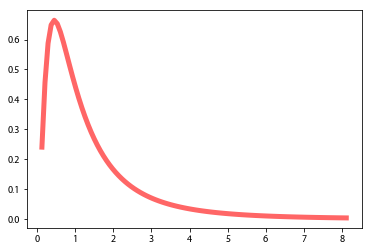

In [9]:
s = 0.9
x = np.linspace(lognorm.ppf(0.01, s),
                lognorm.ppf(0.99, s), 100)
plt.plot(x, lognorm.pdf(x, s),
        'r-', lw=5, alpha=0.6, label='lognorm pdf')

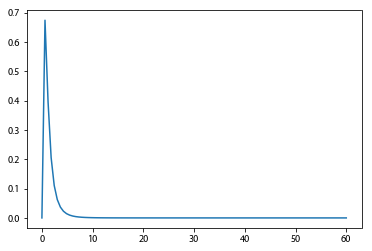

In [10]:
t = np.linspace(00.01, 60, 100)

plt.plot(t, lognorm.pdf(t, 0.8))

In [11]:
def lognormal(t, mu, eps):
    return (np.exp(-0.5 * ((np.log(t) - np.log(mu)) / eps)**2)         / 
            (t * eps * np.sqrt(2*np.pi)))
#    return ((-0.5 * ((np.log(t) - np.log(mu)) / eps)**2))

In [12]:
lognormal(t, 14.70, 0.2).mean()

0.016502750458395835

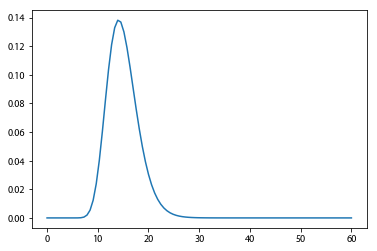

In [13]:
plt.plot(t, lognormal(t, 14.70, 0.2))

In [14]:
t

array([1.00000000e-02, 6.15959596e-01, 1.22191919e+00, 1.82787879e+00,
       2.43383838e+00, 3.03979798e+00, 3.64575758e+00, 4.25171717e+00,
       4.85767677e+00, 5.46363636e+00, 6.06959596e+00, 6.67555556e+00,
       7.28151515e+00, 7.88747475e+00, 8.49343434e+00, 9.09939394e+00,
       9.70535354e+00, 1.03113131e+01, 1.09172727e+01, 1.15232323e+01,
       1.21291919e+01, 1.27351515e+01, 1.33411111e+01, 1.39470707e+01,
       1.45530303e+01, 1.51589899e+01, 1.57649495e+01, 1.63709091e+01,
       1.69768687e+01, 1.75828283e+01, 1.81887879e+01, 1.87947475e+01,
       1.94007071e+01, 2.00066667e+01, 2.06126263e+01, 2.12185859e+01,
       2.18245455e+01, 2.24305051e+01, 2.30364646e+01, 2.36424242e+01,
       2.42483838e+01, 2.48543434e+01, 2.54603030e+01, 2.60662626e+01,
       2.66722222e+01, 2.72781818e+01, 2.78841414e+01, 2.84901010e+01,
       2.90960606e+01, 2.97020202e+01, 3.03079798e+01, 3.09139394e+01,
       3.15198990e+01, 3.21258586e+01, 3.27318182e+01, 3.33377778e+01,
      

In [15]:
def one_at(n, i):
    x = np.zeros(n)
    #x[i] = 1
    if i >= 1:
        x[i - 1] = 1./3
        x[i] = 1./3
        x[i + 1] = 1./3
    else:
        x[i] = 1./3
        x[i + 1] = 1./3
        x[i + 2] = 1./3
    return x

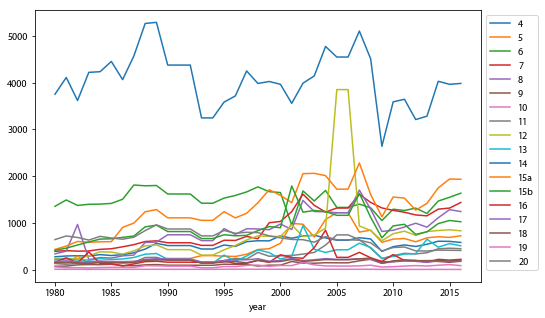

In [16]:
all_demand.plot(figsize=(8, 5));
plt.legend(bbox_to_anchor=(1, 1))

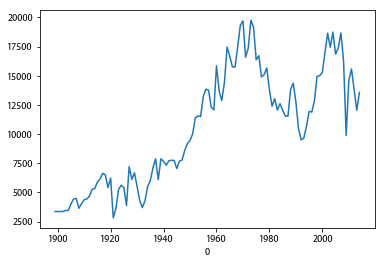

In [17]:
construction = pd.read_table('../data/construction_demand_longterm.txt', index_col=0, header=None)[1]
construction.plot()

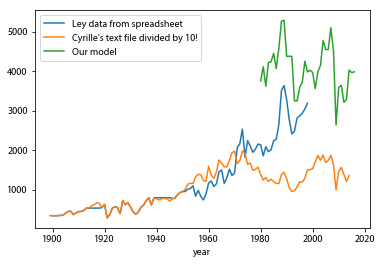

In [18]:
ley = pd.read_excel('./Ley_construction.xlsx', index_col='Year')
ley_total = ley.sum(axis=1)
ley_total[ley_total == 0] = np.nan
ley_total.fillna(method='pad', inplace=True)
ley_total.plot(label='Ley data from spreadsheet');
(construction / 1e1).plot(label='Cyrille\'s text file divided by 10!');
all_demand['14'].plot(label='Our model')
plt.legend();

Figure out growth rate in construction:

In [19]:
ley_total.pct_change().mean()

0.03779894599641882

Model 1900-1980 period as $y = A e^{b(t-1980)}$, with $b = 3.8\%$ as above. Set $A$ so that the values in 1980 match, i.e. $A$ is the value in 1980.

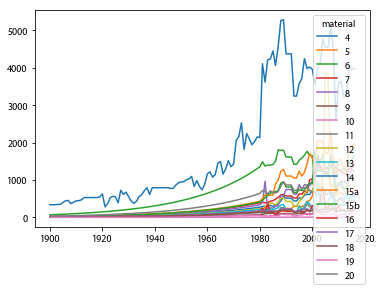

In [20]:
tt = np.arange(1900, 1980)
all_demand2 = pd.concat([
    pd.DataFrame(0, index=tt, columns=all_demand.columns),
    all_demand
])
for c in all_demand.columns:
    all_demand2.loc[1900:1979, c] = all_demand.loc[1980, c] * np.exp(0.037 * (tt - 1980))
all_demand2.loc[1900:1980, '14'] = ley_total.loc[1900:1980]
all_demand2.plot();

Model going forwards based on per-capita stock.

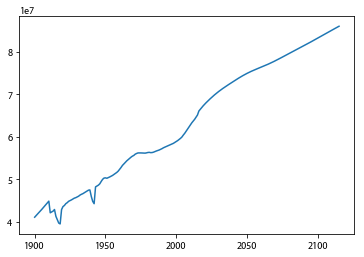

In [21]:
old_pop = pd.read_excel('../data/ukpopulationestimates18512014.xls', sheet_name='UK Total Pop 1851-2014', 
                        skiprows=1, index_col=0).iloc[33:104]['Total Population']
old_pop.index = old_pop.index.astype(int)

pop = pd.concat([
    old_pop,
    pd.read_csv('../data/pop.csv', skiprows=[0, 2, 3, 4, 5, 6], index_col=0).loc[:2015, 'UKPOP'],
    pd.read_csv('../data/pop_projections.csv', index_col=0)['population'] * 1e3,
])

pop.plot();

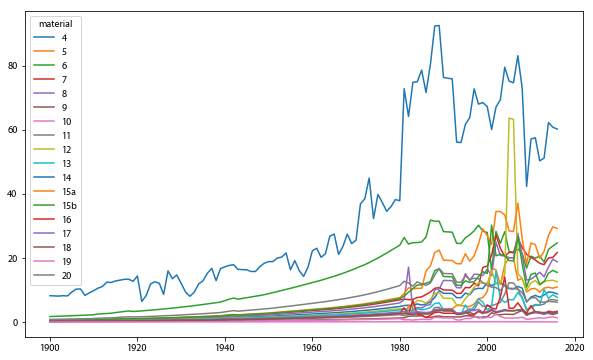

In [22]:
demand_per_capita = (all_demand2.T / pop).T * 1e6
demand_per_capita.plot(figsize=(10, 6));

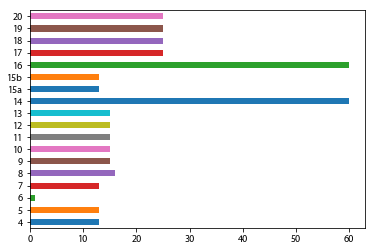

In [23]:
LIFETIMES = {
    # Metal goods = 13, cans and metal boxes = 1, boilers = 10
    '4': 13,
    '5': 13,
    '6': 1,   # packaging  XXX this also includes boilers!
    '7': 13,
    # Electrical engineering
    '8': 16,
    # Mechanical engineering, average 15
    '9': 15,
    '10': 15,
    '11': 15,
    '12': 15,
    '13': 15,
    # Construction
    '14': 60,
    # Vehicles
    '15a': 13,
    '15b': 13,
    # Other transport == Ships?
    '16': 60,
    # Other industries = 25
    '17': 25,
    '18': 25,
    '19': 25,
    '20': 25,
}

pd.Series(LIFETIMES).plot.barh();

In [24]:
t = np.arange(0, max(LIFETIMES.values()) + 2)

# Lifetimes from Davis 2006
lifetimes = pd.DataFrame({
    k: one_at(len(t), lifetime) 
    for k, lifetime in LIFETIMES.items()
})

In [25]:
scrap = pd.DataFrame({
    k: np.convolve(lifetimes[k], all_demand2[k], mode='full')[:len(all_demand2)]
    for k in all_demand2.columns
}, index=all_demand2.index)

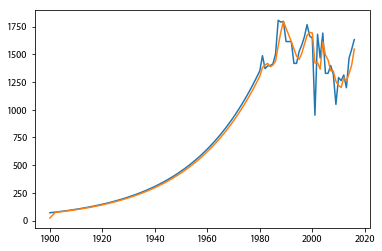

In [26]:
all_demand2['6'].plot()
scrap['6'].plot()

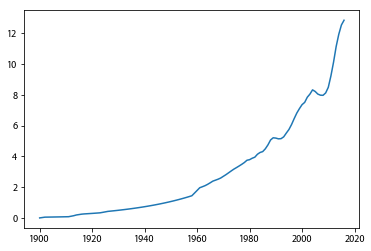

In [27]:
all_scrap = scrap.sum(axis=1) / 1e3
all_scrap.plot()

## Scrap arising data

In [28]:
scrap_data = pd.read_excel('scrap_data.xlsx', sheet_name='data', index_col=0)
scrap_data['arising'] = (scrap_data['external_modelled'] + 
                         scrap_data['exports'].fillna(0) - 
                         scrap_data['imports'].fillna(0))
scrap_data.head()

,consumption,external_measured,external_fraction,external_modelled,exports,imports,arising
year,,,,,,,
1950,10415.0,NaN,0.647285,6741.474245,NaN,NaN,6741.474245
1951,9270.0,NaN,0.647285,6000.331673,NaN,NaN,6000.331673
1952,9215.0,NaN,0.647285,5964.730242,NaN,NaN,5964.730242
1953,9924.0,NaN,0.647285,6423.655688,NaN,NaN,6423.655688
1954,10451.0,NaN,0.647285,6764.777539,NaN,NaN,6764.777539


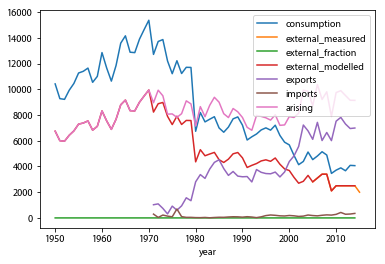

In [29]:
scrap_data.plot();

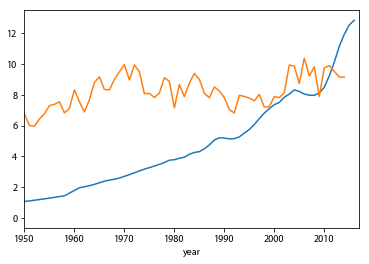

In [30]:
all_scrap.plot()
(scrap_data['arising'] / 1e3).plot();
plt.xlim(1950, 2017);

The spike at the end looks spurious. Where's it coming from?

'MyriadPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'MyriadPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


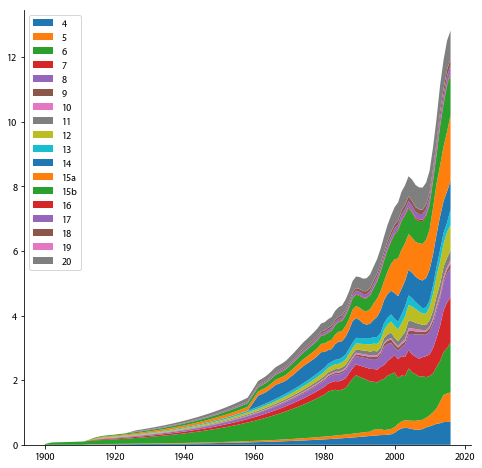

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.stackplot(scrap.index, scrap.values.T/1e3); #, baseline='weighted_wiggle');
plt.legend(scrap.columns, loc='upper left');
plt.savefig('../figures/scrap_arising_1900.pdf', bbox_inches='tight');

'MyriadPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'MyriadPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


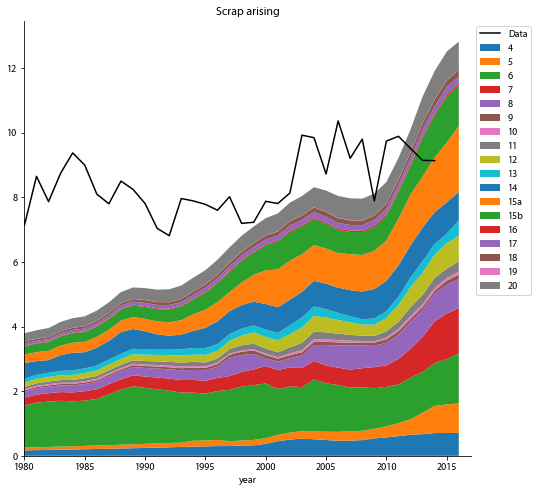

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.stackplot(scrap.index, scrap.values.T/1e3); #, baseline='weighted_wiggle');
(scrap_data['arising'] / 1e3).plot(color='k');
plt.legend(['Data'] + list(scrap.columns), loc='upper left', bbox_to_anchor=(1, 1));
plt.xlim(1980, 2017); plt.title('Scrap arising');
plt.savefig('../figures/scrap_arising_1980.pdf', bbox_inches='tight');

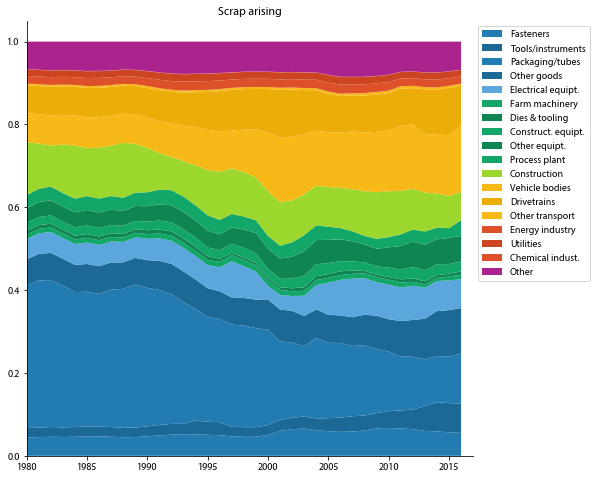

In [33]:
proportions = (scrap.T / scrap.sum(axis=1)).T

fig, ax = plt.subplots(figsize=(8, 8))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.stackplot(proportions.index, proportions.values.T, colors=palette2); #, baseline='weighted_wiggle');
#(scrap_data['arising'] / 1e3).plot(color='k');
plt.legend(sector_names, loc='upper left', bbox_to_anchor=(1, 1));
plt.xlim(1980, 2017); plt.title('Scrap arising');
#plt.savefig('../figures/scrap_arising_1980.pdf', bbox_inches='tight');

In [36]:
avg_proportions = proportions.loc[2005:].mean()
avg_proportions.index = sector_names

'MyriadPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
'MyriadPro-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


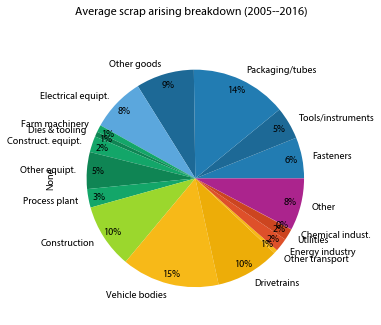

In [37]:
fig, ax = plt.subplots(figsize=(5, 5));
avg_proportions.plot.pie(ax=ax, colors=palette2, autopct='%1.0f%%', pctdistance=0.9, title='');
ax.set_aspect('equal')
fig.suptitle('Average scrap arising breakdown (2005--2016)')
fig.savefig('../figures/scrap_arising_pie.pdf', bbox_inches='tight')

## Stocks

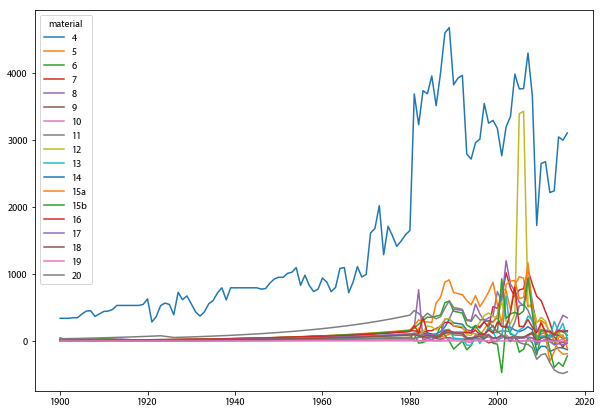

In [38]:
net_additions = all_demand2 - scrap
net_additions.plot(figsize=(10, 7));

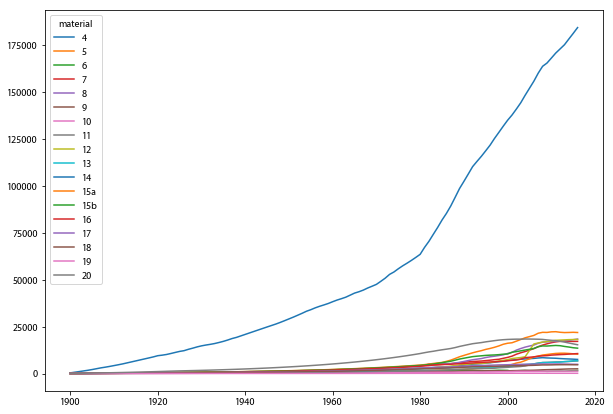

In [39]:
stock = net_additions.cumsum()
stock.plot(figsize=(10, 7));

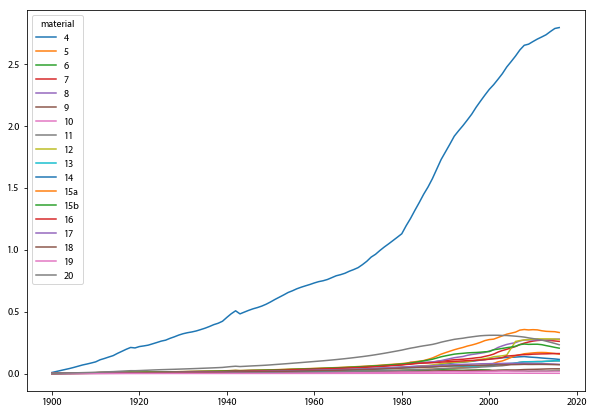

In [40]:
stock_per_capita = (stock.T / pop).T.dropna() * 1e3
stock_per_capita.plot(figsize=(10, 7));

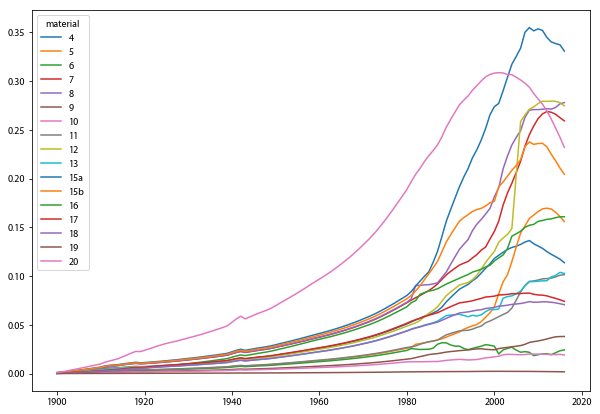

In [41]:
stock_per_capita[[c for c in stock_per_capita.columns if c != '14']].plot(figsize=(10, 7));

In [42]:
stock_per_capita2 = pd.concat([
    stock_per_capita,
    pd.DataFrame(0, index=pop.loc[2017:].index, columns=stock_per_capita.columns)
])
for c in stock_per_capita2.columns:
    stock_per_capita2.loc[2017:, c] = stock_per_capita.loc[2016, c]

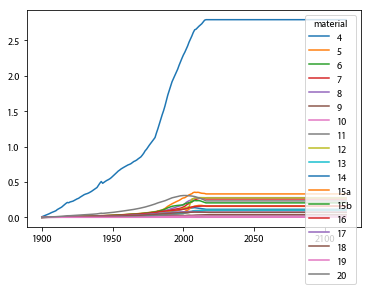

In [43]:
stock_per_capita2.plot();

Now multiply by population projection to get total stock in future

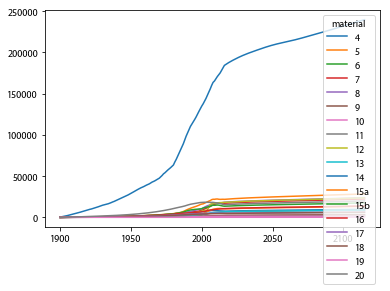

In [44]:
stock2 = (stock_per_capita2.T * pop).T / 1e3
stock2.plot();

Then calculate the inflows and outflows for each step into the future

In [45]:
all_demand3 = pd.concat([
    all_demand2,
    pd.DataFrame(0, index=pop.loc[2017:].index, columns=stock_per_capita.columns)
])
scrap3 = pd.concat([
    scrap,
    pd.DataFrame(0, index=pop.loc[2017:].index, columns=stock_per_capita.columns)
])

In [46]:
scrap3.index.values[-1]

2115

In [47]:
for t in range(2017, 2116):
    scrap3.loc[t] = pd.Series({
        c: sum(lifetimes.loc[i, c] * all_demand3.loc[t - i, c] for i in range(len(lifetimes)))
        for c in all_demand3.columns
    })
    replacement = stock2.loc[t] - stock2.loc[t - 1] + scrap3.loc[t]
    all_demand3.loc[t] = replacement

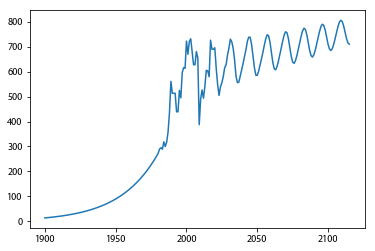

In [48]:
all_demand3['4'].plot();